In [233]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
import datetime
import re

plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
data = pd.read_csv('data/ufo.csv')

In [235]:
data.head()

,Datetime,Location,Shape,Duration,Text,Notes
0,5/6/2017 05:00,"Camp McGregor, NM",Light,10 minute,Light seen over mountain's east of Camp McGre...,Report appears to us to be consistent with t...
1,5/5/2017 11:30,"Austin, TX",Disk,3 second,"Flying saucer descends, possibly lands in Nor...",We would like to communicate with this witne...
2,5/4/2017 21:27,"Phoenix, AZ",Circle,15 second,Orange round sphere. Orange glowing sphere f...,"We have amended the time above, to reflect a..."
3,5/4/2017 18:30,"Phoenix, AZ",Teardrop,5 minute,Flying corkscrews Looking to th east at abou...,Source of the report elects to remain anonymous
4,5/4/2017 04:50,"Taft, CA",Changing,20 second,I'm a truck driver and I've seen the reddish/...,"Witness indicates ""Taft, Indiana"" in origina..."


In [236]:
# One of the timestamps is causing errors
times = data['Datetime']
for n,time in enumerate(times):
    try:
        pd.to_datetime(time)
    except:
        print(n)
data = data.drop(index=1540)

1540


In [237]:
data['dt'] = pd.to_datetime(data['Datetime'])

In [238]:
data = data.drop(columns='Datetime')
data['dates'] = data['dt'].dt.normalize()
data['times'] = data['dt'].dt.time

In [239]:
data['City'] = data['Location'].apply(lambda x: " ".join(x.split(', ')[:1]))
data['State'] = data['Location'].apply(lambda x: " ".join(x.split(', ')[1:]))
data.drop('Location', axis=1, inplace=True)

In [240]:
data.drop('dt', axis=1, inplace=True)

In [241]:
data.head()

,Shape,Duration,Text,Notes,dates,times,City,State
0,Light,10 minute,Light seen over mountain's east of Camp McGre...,Report appears to us to be consistent with t...,2017-05-06,05:00:00,Camp McGregor,NM
1,Disk,3 second,"Flying saucer descends, possibly lands in Nor...",We would like to communicate with this witne...,2017-05-05,11:30:00,Austin,TX
2,Circle,15 second,Orange round sphere. Orange glowing sphere f...,"We have amended the time above, to reflect a...",2017-05-04,21:27:00,Phoenix,AZ
3,Teardrop,5 minute,Flying corkscrews Looking to th east at abou...,Source of the report elects to remain anonymous,2017-05-04,18:30:00,Phoenix,AZ
4,Changing,20 second,I'm a truck driver and I've seen the reddish/...,"Witness indicates ""Taft, Indiana"" in origina...",2017-05-04,04:50:00,Taft,CA


In [242]:
data['state'].replace('', 'Unknown')

KeyError: 'state'

In [217]:
# Duration Column


'minutes'

In [243]:
test = data.copy()

In [244]:
data['dur1'] = data['Duration'].apply(lambda x: int(re.search('[0-9]+', x)[0]) if re.search('[0-9]+', x) else 0)
data['dur2'] = data['Duration'].apply(lambda x: re.search('[a-z]+', x)[0] if re.search('[a-z]+', x) else 0)

In [245]:
data.drop('Duration', axis=1, inplace=True)

In [246]:
second_cols = data[data['dur2'] == 'second']
minute_cols = data[data['dur2'] == 'minute']

In [247]:
second_cols['duration'] = second_cols['dur1']/60
minute_cols['duration'] = minute_cols['dur1']

/home/maureen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/maureen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [252]:
df = pd.concat([minute_cols, second_cols])
data = df.copy()

In [ ]:
def remove_notes(df):

data.iloc[0,6]

samp = data.iloc[0,5].replace(data.iloc[0,6], '')

## Do some inital EDA on the pandas dataframe
columns: Date, Time, Location, Shape, Duration, Observation Text, Note Text

In [36]:
time = ['2016-10-08 07:34:13', '2015-11-15 06:12:48',
               '2015-01-24 10:11:04', '2015-03-26 16:23:53',
               '2017-04-01 00:38:21', '2015-05-15 03:47:54',
               '2015-06-24 07:32:32']
times = pd.to_datetime(time)

DatetimeIndex(['2016-10-08 07:34:13', '2015-11-15 06:12:48',
               '2015-01-24 10:11:04', '2015-03-26 16:23:53',
               '2017-04-01 00:38:21', '2015-05-15 03:47:54',
               '2015-06-24 07:32:32'],
              dtype='datetime64[ns]', freq=None)

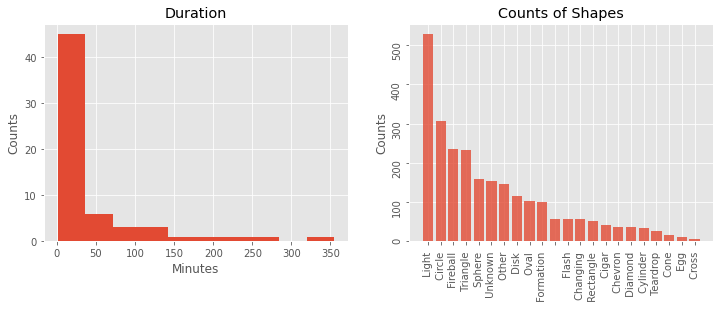

In [260]:
# Lets look at shapes and durations
shape_counts = data['Shape'].value_counts()
fig, axes = plt.subplots(1,2,figsize=(12,4))

ax = axes[0]
duration_counts = data['duration'].value_counts()
ax.hist(duration_counts)#.index, height=duration_counts.values, alpha=0.8)
ax.set_title("Duration")
ax.set_ylabel("Counts")
ax.set_xlabel("Minutes")

ax = axes[1]
ax.bar(shape_counts.index, height=shape_counts.values, alpha=0.8)
ax.set_title("Counts of Shapes")
ax.set_ylabel("Counts")
ax.tick_params(labelrotation=90)

plt.savefig('images/shape_duration.png', bbox_inches='tight')

In [178]:
data['state'].value_counts().index
labels = ['CA ', 'FL ', 'AZ ', 'WA ', 'Unknown', 'NY ', 'CO ', 'PA ', 'TX ', 'NC ',
       'GA ', 'OH ', 'OR ', 'IL ', 'WI ', 'TN ', 'MO ', 'MI ', 'NJ ', 'MD ']

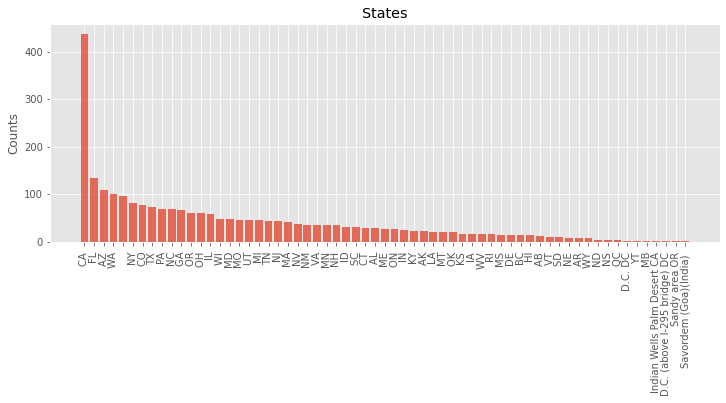

In [258]:
# Locations
state_counts = data['State'].value_counts()
fig, ax = plt.subplots(figsize=(12,4))

ax.bar(state_counts.index, height=state_counts.values, alpha=0.8)
ax.set_title("States")
ax.set_ylabel("Counts")
plt.xticks(rotation=90)
plt.savefig('images/state_counts.png', bbox_inches='tight')

In [151]:
df = data.copy()

In [152]:
early_morning = df[df['times'] < datetime.time(5, 0,0)]
morning = df[(df['times'] > datetime.time(5,0,0)) & (df['times'] < datetime.time(12,0,0))]
afternoon = df[(df['times'] > datetime.time(12,0,0)) & (df['times'] < datetime.time(17,0,0))]
evening = df[(df['times'] > datetime.time(17,0,0)) & (df['times'] < datetime.time(23,59,59))]

In [153]:
early_morning.shape[0]

439

In [156]:
def find_times(df):
    early_morning = df[df['times'] < datetime.time(5, 0,0)]
    morning = df[(df['times'] > datetime.time(5,0,0)) & (df['times'] < datetime.time(12,0,0))]
    afternoon = df[(df['times'] > datetime.time(12,0,0)) & (df['times'] < datetime.time(17,0,0))]
    evening = df[(df['times'] > datetime.time(17,0,0)) & (df['times'] < datetime.time(23,59,59))]
    
    n_earlymorning = early_morning.shape[0]
    n_morning = morning.shape[0]
    n_afternoon = afternoon.shape[0]
    n_evening = evening.shape[0]
    
    return [n_earlymorning, n_morning, n_afternoon, n_evening]

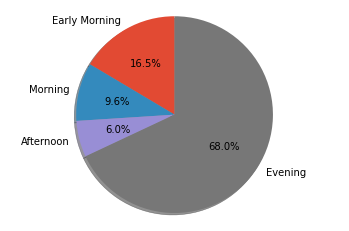

In [157]:
# Make pie-chart of times
labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening']
sizes = find_times(df)
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('images/time_of_day.png')
